In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pll

In [49]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
print (ads.head())

data =  pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])
print (data.head())

                        Ads
Time                       
2017-09-13 00:00:00   80115
2017-09-13 01:00:00   79885
2017-09-13 02:00:00   89325
2017-09-13 03:00:00  101930
2017-09-13 04:00:00  121630
            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111
2017-05-04           856601
2017-05-05           793775

 Data Types:
GEMS_GEMS_SPENT    int64
dtype: object

 Parsed Data:
            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111
2017-05-04           856601
2017-05-05           793775


In [13]:
data.index 

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10',
               ...
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24'],
              dtype='datetime64[ns]', name='Time', length=300, freq=None)

In [94]:
ads.index

DatetimeIndex(['2017-09-13 00:00:00', '2017-09-13 01:00:00',
               '2017-09-13 02:00:00', '2017-09-13 03:00:00',
               '2017-09-13 04:00:00', '2017-09-13 05:00:00',
               '2017-09-13 06:00:00', '2017-09-13 07:00:00',
               '2017-09-13 08:00:00', '2017-09-13 09:00:00',
               ...
               '2017-09-21 14:00:00', '2017-09-21 15:00:00',
               '2017-09-21 16:00:00', '2017-09-21 17:00:00',
               '2017-09-21 18:00:00', '2017-09-21 19:00:00',
               '2017-09-21 20:00:00', '2017-09-21 21:00:00',
               '2017-09-21 22:00:00', '2017-09-21 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=216, freq=None)

dtype='datetime[ns]' подтверждает, что это объект datetime. 


# ARIMA for currency

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
df_AP=adfuller(data, autolag='AIC')

In [16]:
df_AP[0:4]

(-1.8160113962891058, 0.3725419518945776, 14, 285)

In [17]:
dfoutput = pd.Series(df_AP[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for  key, value in df_AP[4].items():
     dfoutput['Critical value (%s)' %key] = value

print(dfoutput) 

Test Statistic                  -1.816011
p-value                          0.372542
#Lags Used                      14.000000
Number of Observations Used    285.000000
Critical value (1%)             -3.453505
Critical value (5%)             -2.871735
Critical value (10%)            -2.572202
dtype: float64


In [24]:
xx=data.columns.to_list()
ts = data[xx[0]] 
ts.head(10)

Time
2017-05-01    1199436
2017-05-02    1045515
2017-05-03     586111
2017-05-04     856601
2017-05-05     793775
2017-05-06     606535
2017-05-07    1112763
2017-05-08    1121218
2017-05-09     813844
2017-05-10     903343
Name: GEMS_GEMS_SPENT, dtype: int64

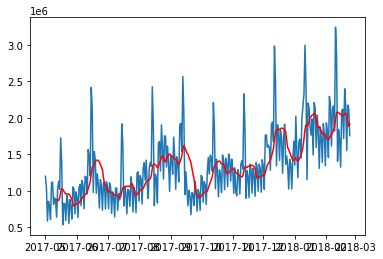

In [25]:
rolmean = ts.rolling(12).mean()
plt.plot(data[xx[0]])
plt.plot(rolmean, 'r')

In [26]:
rolmean[0:11]=rolmean[11]

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
decomp_AP=seasonal_decompose(ts)

In [29]:
trend=decomp_AP.trend
season=decomp_AP.seasonal
resid=decomp_AP.resid

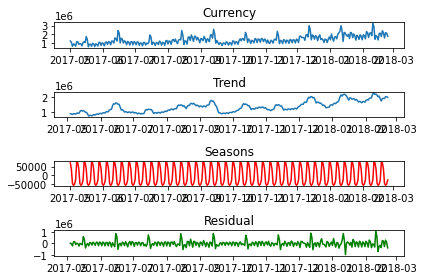

In [30]:
pll.subplot(411)
pll.plot(ts)
pll.title('Currency')
pll.subplot(412)
pll.plot(trend)
pll.title('Trend')
pll.subplot(413)
pll.plot(season, 'r')
pll.title('Seasons')
pll.subplot(414)
pll.plot(resid, 'g')
pll.title('Residual')
pll.tight_layout()

In [ ]:
resid.dropna(inplace=True)

y_t=a0+a1*y_(t-1)+a2*y_(t-2)+....+aq*y(t-q)+b0*e_t+b1*e_(t-1)+...bp*e(t-p)  ##ARMA(p,d,q)

In [32]:
from statsmodels.tsa.stattools import acf 

In [33]:
ts_diff=np.array(resid[1:])/np.array(resid[:-1])

In [34]:
lag_AP=acf(ts_diff, nlags=20)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [35]:
lag_AP

array([ 1.00000000e+00, -3.19720273e-03, -1.24982833e-03, -8.09388077e-03,
       -3.55594822e-03, -1.04061551e-02, -2.90342922e-02, -9.15326661e-03,
       -1.03835658e-03,  4.21145736e-02, -2.62234370e-03, -2.51162284e-04,
       -6.67276631e-03, -1.99945320e-03, -2.10041959e-03, -4.52979604e-03,
       -4.58650498e-03,  1.94400429e-03,  1.96774195e-04, -2.36488107e-03,
        2.38589729e-03])

Text(0.5, 1.0, 'Autocorrelation Function')

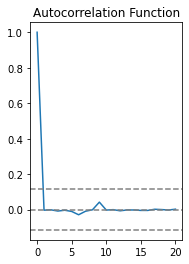

In [36]:
plt.subplot(121) 
plt.plot(lag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [37]:
from statsmodels.tsa.stattools import pacf 

Text(0.5, 1.0, 'Partial Autocorrelation Function')

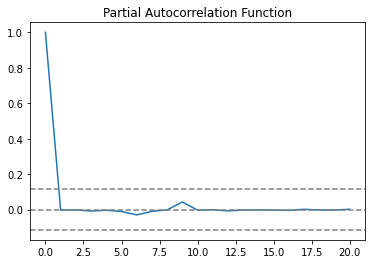

In [39]:
plag_AP=pacf(ts_diff, nlags=20)
plt.plot(plag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [40]:
from statsmodels.tsa.arima_model import ARIMA

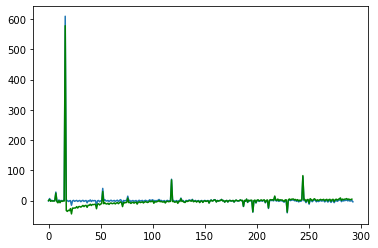

In [41]:
model = ARIMA(ts_diff, order=(2, 1, 2))
resid_110=model.fit()
pll.plot(ts_diff)
pll.plot(-resid_110.fittedvalues, color='green')

In [57]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

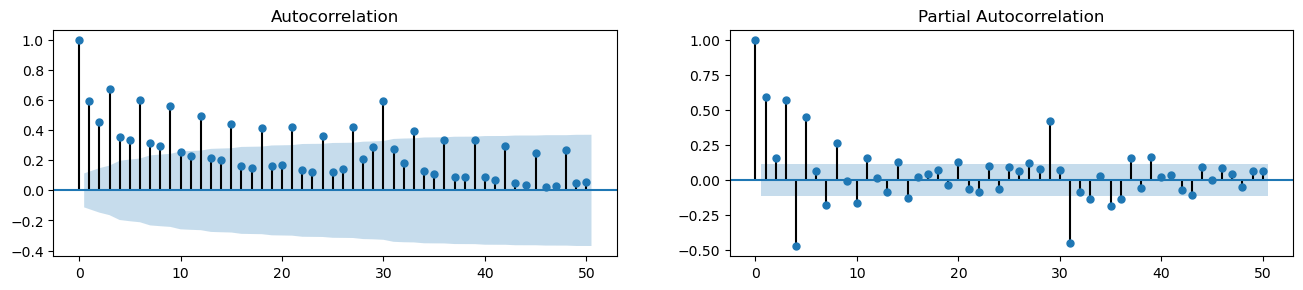

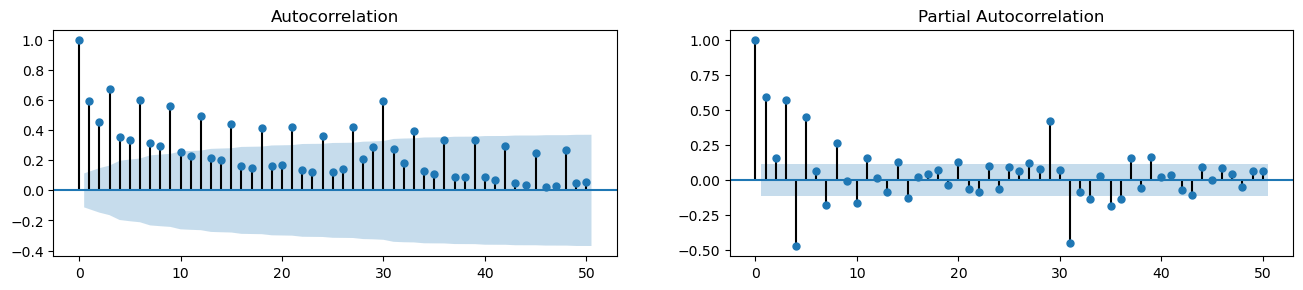

In [58]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.GEMS_GEMS_SPENT.tolist(), lags=50, ax=axes[0])
plot_pacf(data.GEMS_GEMS_SPENT.tolist(), lags=50, ax=axes[1])

In [59]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data.GEMS_GEMS_SPENT, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Currency', y=1.05)    
plt.show()

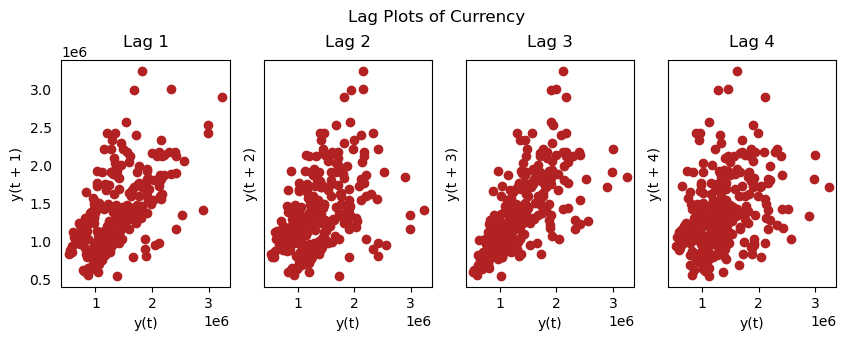

In [66]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data.GEMS_GEMS_SPENT, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Currency', y=1.05)    
plt.show()


In [63]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

In [64]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))



In [67]:
print(ApEn(data.GEMS_GEMS_SPENT, m=2, r=0.2*np.std(data.GEMS_GEMS_SPENT)))     # 0.7344005533464824
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.20866292503301764
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.8129244514578482

0.7344005533464824
0.20866292503301764
0.8129244514578482


In [68]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [70]:
print(SampEn(data.GEMS_GEMS_SPENT, m=2, r=0.2*np.std(data.GEMS_GEMS_SPENT)))      # 0.802820582730574
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # inf
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.0940403411009885

0.802820582730574
inf
2.0940403411009885


<ipython-input-68-e15b42d4a182>:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


In [82]:
from statsmodels.tsa.arima_model import ARIMA
data.dropna(inplace=True)
# 1,1,2 ARIMA Model
model = ARIMA(data.GEMS_GEMS_SPENT, order=(1,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:      D.GEMS_GEMS_SPENT   No. Observations:                  299
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -4213.145
Method:                       css-mle   S.D. of innovations         317955.604
Date:                Wed, 09 Feb 2022   AIC                           8438.290
Time:                        20:24:50   BIC                           8460.493
Sample:                    05-02-2017   HQIC                          8447.177
                         - 02-24-2018                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1862.7359   5223.957      0.357      0.721   -8376.032    1.21e+04
ar.L1.D.GEMS_GEMS_SPENT    -0.1483      0.117     -1.265      0.206      -0.378       0.081


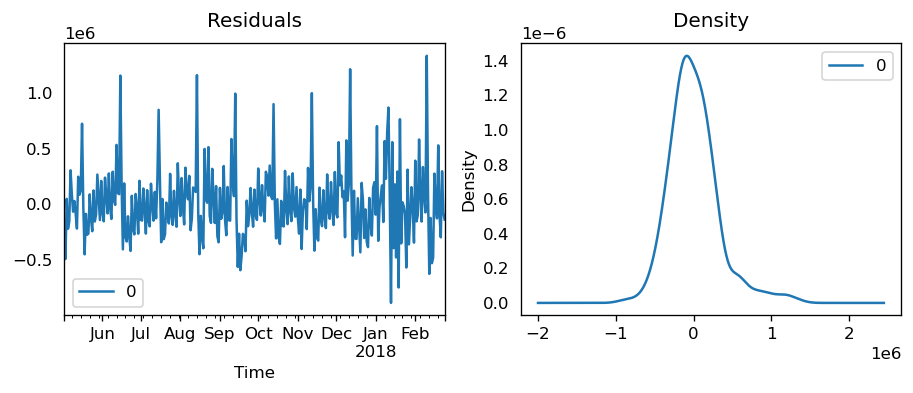

In [83]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

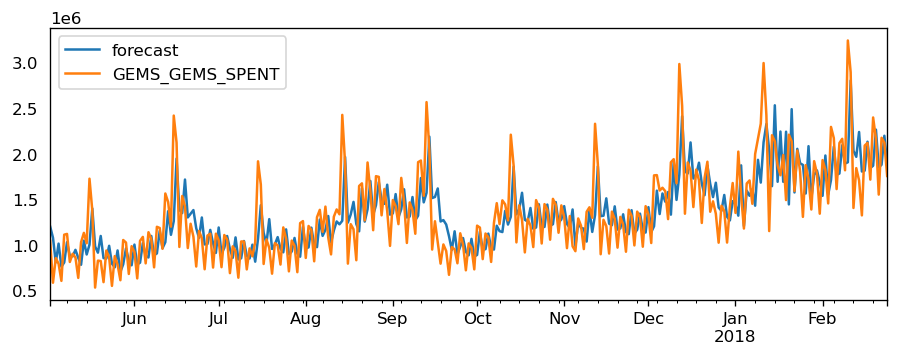

In [84]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [85]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data.GEMS_GEMS_SPENT[:175]
test = data.GEMS_GEMS_SPENT[175:]

In [86]:
test.size

125

In [90]:
pip install pmdarima

     |████████████████████████████████| 595 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 8.3 MB/s eta 0:00:01    |██▏                             | 1.2 MB 1.8 MB/s eta 0:00:10     |████████                        | 4.4 MB 1.8 MB/s eta 0:00:08     |█████████████▌                  | 7.4 MB 6.5 MB/s eta 0:00:02     |████████████████████▎           | 11.2 MB 6.5 MB/s eta 0:00:01
ERROR: arch 4.15 requires property-cached>=1.6.3, which is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
Note: you may need to restart the kernel to use updated packages.


In [91]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [93]:
# Create Training and Test
model = pm.auto_arima(data.GEMS_GEMS_SPENT, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8541.125, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9357.789, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8636.854, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9153.753, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8655.878, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8509.474, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9112.550, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8474.216, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=8291.737, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8396.362, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=8298.412, Time=0.94 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8485.670, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8285.874, Time=0.90 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8486.094, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

# ARIMA for ads

In [95]:
df_AP=adfuller(ads, autolag='AIC')
df_AP[0:4]

(-7.089633890638512, 4.4448036886224977e-10, 9, 206)

In [96]:
dfoutput = pd.Series(df_AP[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for  key, value in df_AP[4].items():
     dfoutput['Critical value (%s)' %key] = value

print(dfoutput) 

Test Statistic                -7.089634e+00
p-value                        4.444804e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.060000e+02
Critical value (1%)           -3.462499e+00
Critical value (5%)           -2.875675e+00
Critical value (10%)          -2.574304e+00
dtype: float64


In [97]:
xx=ads.columns.to_list()
ts = ads[xx[0]] 
ts.head(10)

Time
2017-09-13 00:00:00     80115
2017-09-13 01:00:00     79885
2017-09-13 02:00:00     89325
2017-09-13 03:00:00    101930
2017-09-13 04:00:00    121630
2017-09-13 05:00:00    116475
2017-09-13 06:00:00    106495
2017-09-13 07:00:00    102795
2017-09-13 08:00:00    108055
2017-09-13 09:00:00    116125
Name: Ads, dtype: int64

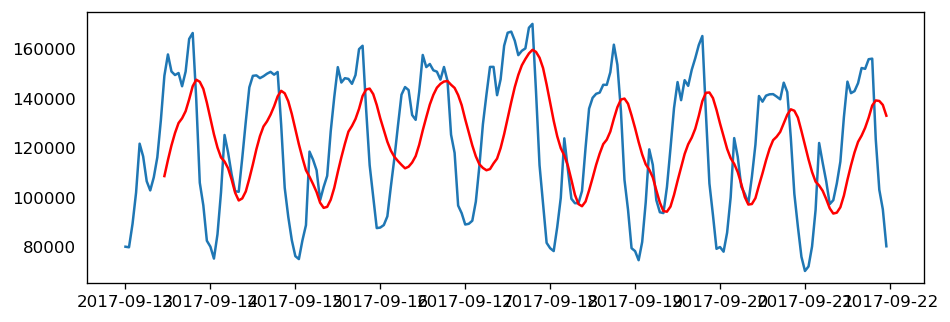

In [98]:
rolmean = ts.rolling(12).mean()
plt.plot(ads[xx[0]])
plt.plot(rolmean, 'r')

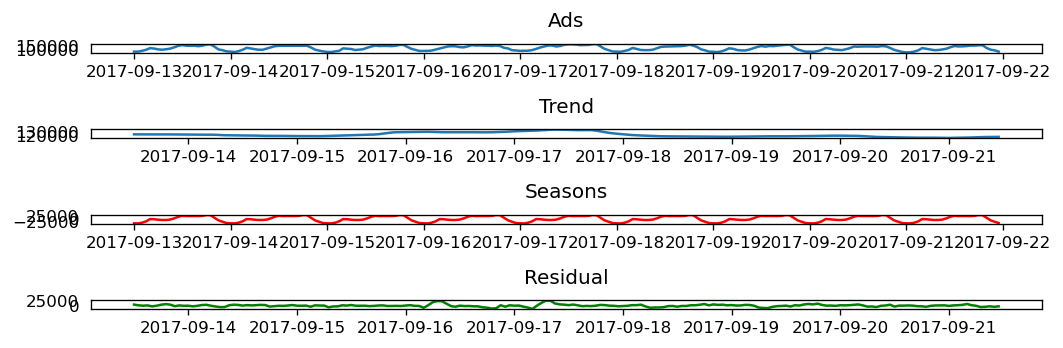

In [101]:
rolmean[0:11]=rolmean[11]

decomp_AP=seasonal_decompose(ts)
trend=decomp_AP.trend
season=decomp_AP.seasonal
resid=decomp_AP.resid

pll.subplot(411)
pll.plot(ts)
pll.title('Ads')
pll.subplot(412)
pll.plot(trend)
pll.title('Trend')
pll.subplot(413)
pll.plot(season, 'r')
pll.title('Seasons')
pll.subplot(414)
pll.plot(resid, 'g')
pll.title('Residual')
pll.tight_layout()

In [102]:
resid.dropna(inplace=True)
ts_diff=np.array(resid[1:])/np.array(resid[:-1])
lag_AP=acf(ts_diff, nlags=20)
lag_AP

array([ 1.        , -0.00248173, -0.0039299 , -0.00191787,  0.04740729,
       -0.00493065, -0.00459143, -0.00180957, -0.00383939, -0.03710824,
       -0.00273485, -0.00502175, -0.00661633, -0.00752366, -0.08333337,
       -0.00259347, -0.00630473, -0.00411949, -0.00818507, -0.00567433,
       -0.0063188 ])

Text(0.5, 1.0, 'Autocorrelation Function')

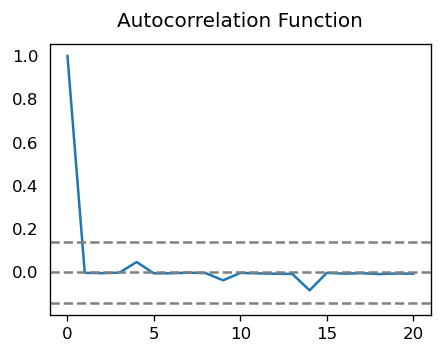

In [103]:
plt.subplot(121) 
plt.plot(lag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

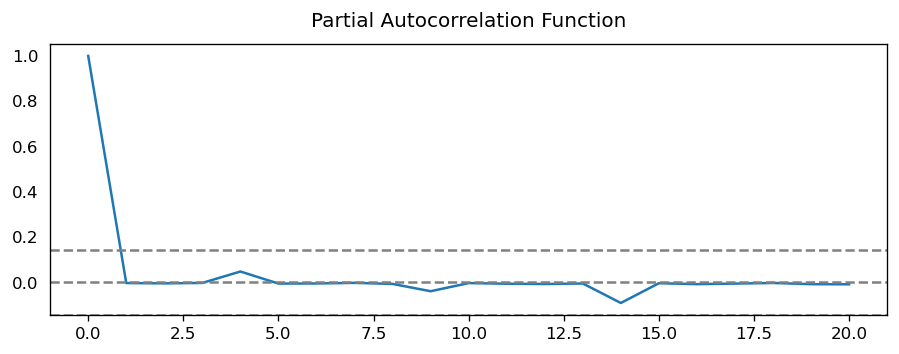

In [104]:
plag_AP=pacf(ts_diff, nlags=20)
plt.plot(plag_AP)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


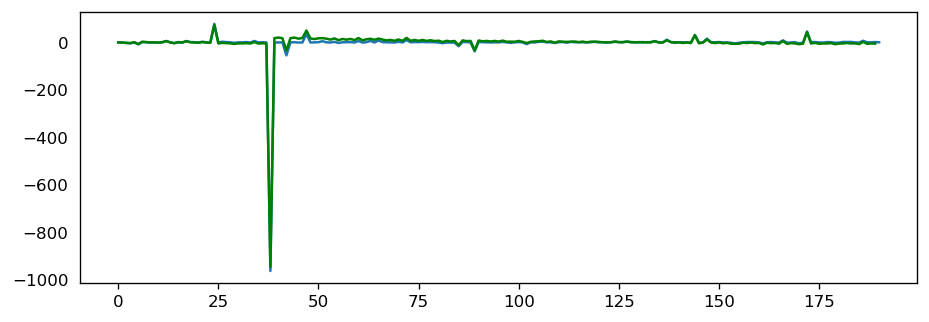

In [105]:
model = ARIMA(ts_diff, order=(2, 1, 2))
resid_110=model.fit()
pll.plot(ts_diff)
pll.plot(-resid_110.fittedvalues, color='green')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


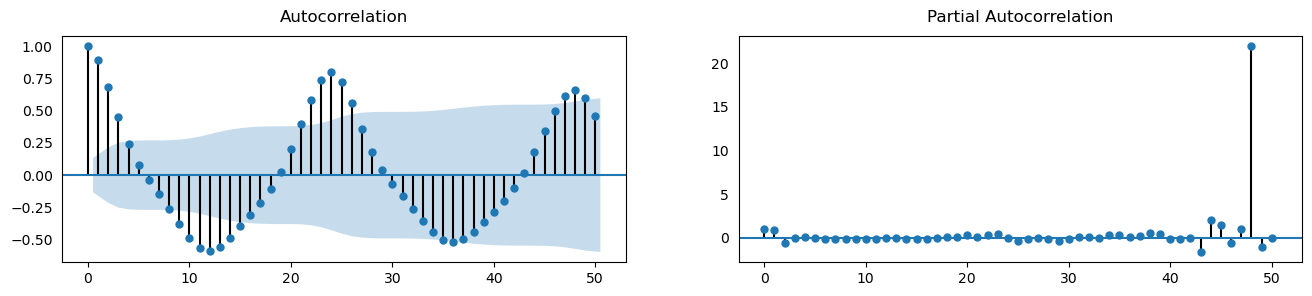

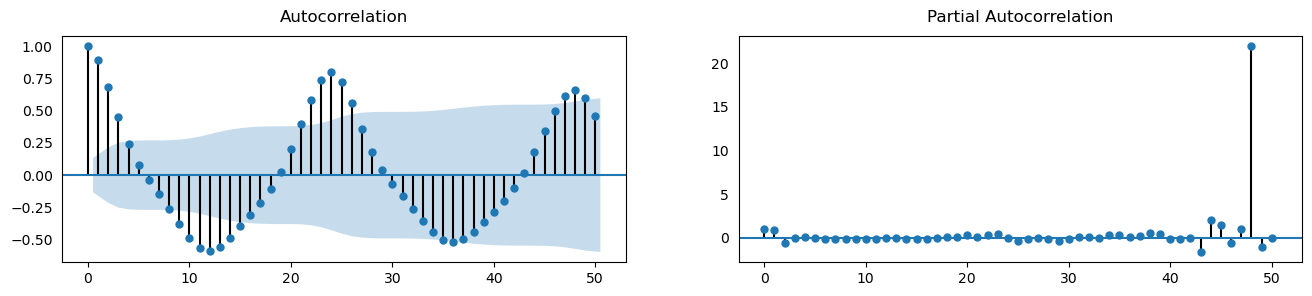

In [106]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ads.Ads.tolist(), lags=50, ax=axes[0])
plot_pacf(ads.Ads.tolist(), lags=50, ax=axes[1])

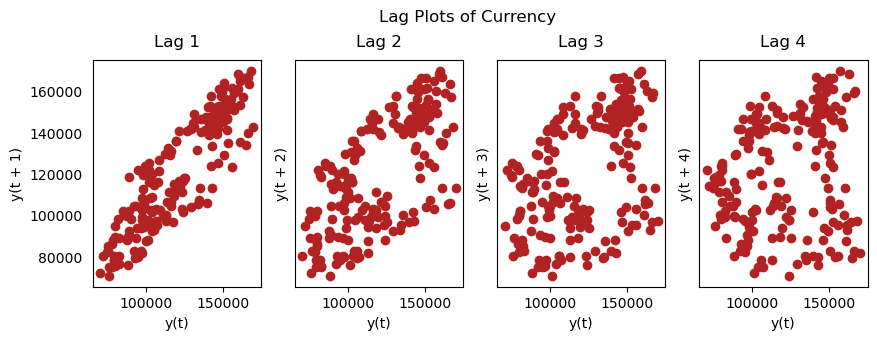

In [108]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ads.Ads, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Currency', y=1.05)    
plt.show()

In [110]:
print(ApEn(ads.Ads, m=2, r=0.2*np.std(ads.Ads)))     # 0.6676733477353398
print(SampEn(ads.Ads, m=2, r=0.2*np.std(ads.Ads)))      # 0.6980371658541371

0.6676733477353398
0.6980371658541371


In [159]:
ads_new.dropna(inplace=True)
# 1,1,2 ARIMA Model
model = ARIMA(ads.Ads, order=(1, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.Ads   No. Observations:                  215
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2281.231
Method:                       css-mle   S.D. of innovations           9803.658
Date:                Wed, 09 Feb 2022   AIC                           4570.461
Time:                        21:20:31   BIC                           4583.944
Sample:                    09-13-2017   HQIC                          4575.909
                         - 09-21-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7907   1385.193      0.001      1.000   -2714.137    2715.719
ar.L1.D.Ads     0.4258      0.093      4.601      0.000       0.244       0.607
ma.L1.D.Ads     0.1946      0.091      2.129    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


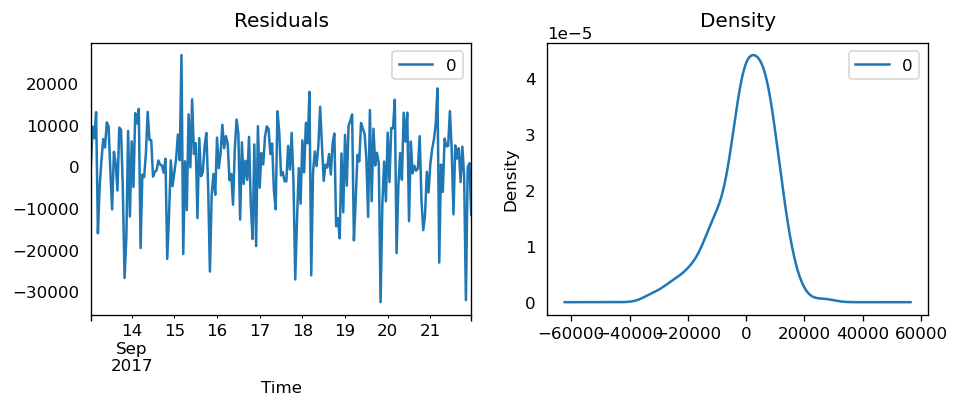

In [160]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

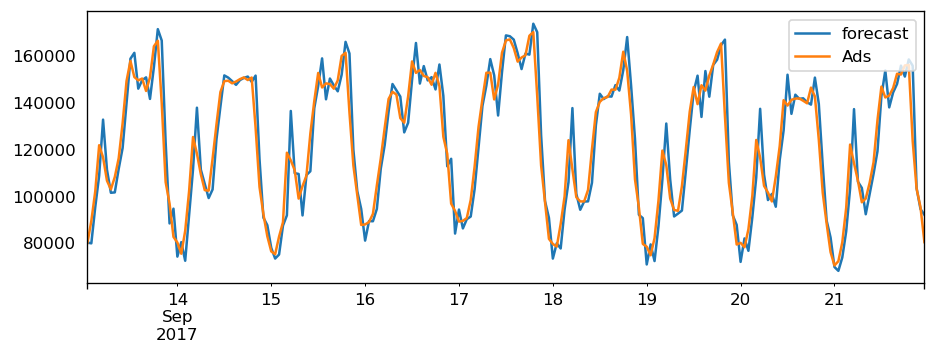

In [161]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [162]:
train = ads.Ads[:175]
test = ads.Ads[175:]
model = pm.auto_arima(ads.Ads, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4608.593, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5684.857, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5530.857, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4594.616, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4596.601, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4592.119, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4590.294, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5491.271, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4592.274, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5479.773, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4570.543, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4811.0